## Quantum Circuits

In [16]:
from qiskit.circuit import QuantumCircuit
import numpy as np 
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi 
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit import assemble
from qiskit import QuantumRegister

qc =  QuantumCircuit()

## Quantum Registers

The introduce to the register   
[Registers vs Counters](https://www.geeksforgeeks.org/registers-vs-counters/)

In [17]:

qr =  QuantumRegister(2,'a') # Create a quantum register with 2 qubits, named 'a'

In [18]:
qc.add_register(qr) # Add the quantum register to the quantum circuit
qc.qregs # Display the quantum registers in the quantum circuit

[QuantumRegister(2, 'a')]

In [19]:
qc.draw() # Draw the quantum circuit 
          # and the current state of the quantum registers is /0> /0>

a_0: 
     
a_1:

Register: A very fast computer memory used to store data instructions during execution. It is a group of flip-flops capable of storing binary information of n-bits. 

Gate: Logic gates used to perform logical operations on binary inputs. Examples include AND, OR, NOT, XOR, NAND, and NOR gates.

## Applying Gates

In [20]:
qc.h(qr[0]) # Apply a Hadamard gate to the first qubit in the quantum register

In [21]:
qc.cx(qr[0], qr[1]) # Apply a CNOT gate to the first and second qubits in the quantum register

In [22]:
qc.draw() # Draw the quantum circuit

┌───┐     
a_0: ┤ H ├──■──
     └───┘┌─┴─┐
a_1: ─────┤ X ├
          └───┘

## Aer simulator
How to import the Qiskit Aer simulator backend and use it to run ideal (noise free).

In [23]:

# Create the simulator
sv_sim = AerSimulator(method='statevector')

# Add save_statevector instruction if not already present
if not any(instr[0].name == 'save_statevector' for instr in qc.data):
    qc.save_statevector()

# Transpile the circuit for the simulator
qc_transpiled = transpile(qc, sv_sim)

# Run the simulation
job = sv_sim.run(qc_transpiled)
result = job.result()
print(result)

# Get the statevector
ket = result.get_statevector()

# Print the statevector amplitudes
for amplitude in ket:
    print(amplitude)

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='c1b56500-a849-4ae0-88c3-53e0f53c869b', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=2, name='circuit-166', qreg_sizes=[['a', 2]], metadata={}), status=DONE, seed_simulator=3938304815, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 5.4709e-05, 'measure_sampling': True, 'num_clbits': 0, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'statevector', 'required_memory_mb': 1, 'resu

/var/folders/qw/st6grd6j1t1c8z6m5_4pkk500000gn/T/ipykernel_11976/2612542229.py:5: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if not any(instr[0].name == 'save_statevector' for instr in qc.data):
/var/folders/qw/st6grd6j1t1c8z6m5_4pkk500000gn/T/ipykernel_11976/2612542229.py:20: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for amplitude in ket:


In [24]:


simulator =  AerSimulator()

# Create circuit
circ =  QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')


MissingOptionalLibraryError: "The 'matplotlib' library is required to use '_plotting_core'. You can install it with 'pip install matplotlib'."

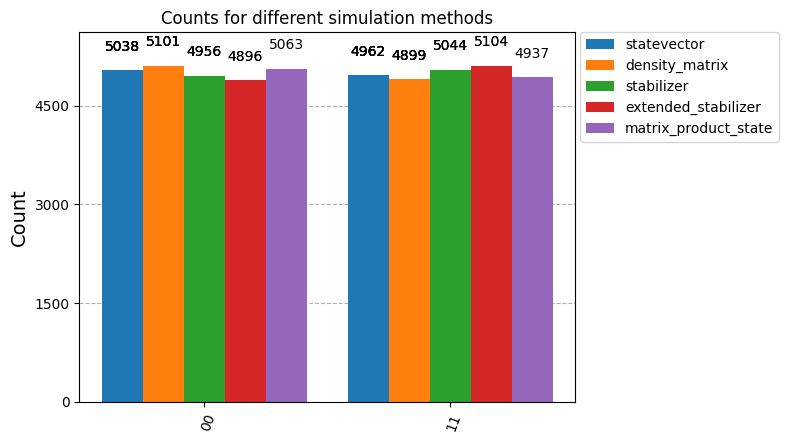

In [ ]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

**Statevector**:

* Description: Simulates the quantum circuit by directly evolving the state vector of the quantum system.  
* Use Case: Suitable for small to medium-sized circuits where you need the full quantum state. It provides exact results but can be memory-intensive for large circuits.  
 
**Density Matrix**:  

* Description: Simulates the quantum circuit using density matrices, which can represent mixed states and account for noise and decoherence.  
* Use Case: Useful for simulating noisy quantum circuits and studying the effects of decoherence and other noise processes.  

**Stabilizer**:  

* Description: Uses the stabilizer formalism to efficiently simulate circuits that can be described by stabilizer states (e.g., Clifford circuits).  
* Use Case: Highly efficient for simulating Clifford circuits, which are a subset of quantum circuits that can be described using stabilizer states. Not suitable for general quantum circuits.  

**Extended Stabilizer**:  

* Description: Extends the stabilizer formalism to handle a larger class of circuits by including non-Clifford gates.   
* Use Case: Provides a balance between efficiency and generality, allowing for the simulation of circuits that include some non-Clifford gates while still being more efficient than a full statevector simulation.  

In [11]:
new_qc =  QuantumCircuit(qr)
new_qc.initialize(ket, qr)

In [12]:
from qiskit import ClassicalRegister
cr = ClassicalRegister(2,'c') # Create a classical register with 2 bits, named 'c'
qc.add_register(cr)

In [13]:
qc.measure(qr[0], cr[0]) # Measure the first qubit in the quantum register and store the result in the first bit of the classical register
qc.measure(qr[1], cr[1]) # Measure the second qubit in the quantum register and store the result in the second bit of the classical register
qc.draw() # Draw the quantum circuit

┌───┐      statevector ┌─┐   
a_0: ┤ H ├──■────────░──────┤M├───
     └───┘┌─┴─┐      ░      └╥┘┌─┐
a_1: ─────┤ X ├──────░───────╫─┤M├
          └───┘      ░       ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

In [14]:

aer_sim = AerSimulator(method='statevector')
qobj = assemble(qc, shots=8192)
job = aer_sim.run(qobj)

/var/folders/qw/st6grd6j1t1c8z6m5_4pkk500000gn/T/ipykernel_4923/1590434267.py:3: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc, shots=8192)


In [ ]:
# Transpile the circuit for the simulator
qc_transpiled = transpile(qc, aer_sim)

# Run the simulation
job = aer_sim.run(qc_transpiled)
hist = job.result().get_counts()
print(hist) 

{'11': 520, '00': 504}


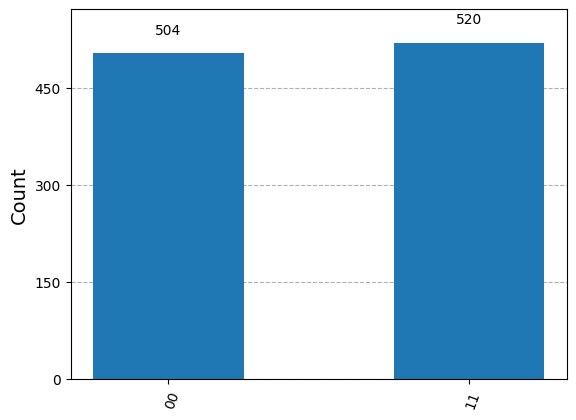

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(hist)

In [ ]:
# Transpile the circuit for the simulator
qc_transpiled = transpile(qc, aer_sim)

# Run the simulation
job = aer_sim.run(qc_transpiled, shots=10, memory=True)
result = job.result()

# Get the memory
samples = result.get_memory()
print(samples)

['00', '00', '00', '00', '00', '00', '11', '11', '00', '11']


In [26]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
qc_2 = QuantumCircuit(qubit, bit)

qc_2.x(qubit[7])
qc_2.measure(qubit, bit) # Measure all qubits in the quantum register and store the result in the classical register

qc_transpiled = transpile(qc_2, aer_sim)
aer_sim.run(qc_transpiled,shots=8192).result().get_counts()

{'10000000': 8192}

In [27]:
qc = QuantumCircuit(3)
qc.h(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

In [30]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.cx(1,0)

qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     └───┘└─┬─┘
q_1: ───────■──
               
c: 1/══════════

In [31]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [32]:
toggle_cx = sub_circuit.to_instruction()

In [33]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)
new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])
new_qc.draw()

q6_0: ──────────────
      ┌────────────┐
q6_1: ┤0           ├
      │            │
q6_2: ┤1 toggle_cx ├
      │            │
q6_3: ┤2           ├
      └────────────┘

## Accessing on real quantum hardware

In [36]:
from qiskit_ibm_runtime import QiskitRuntimeService, ibm_backend

token = "ApiKey-ea46b533-67a5-4c25-967c-33b59c3a37e0"  # replace with your API token

# Save the account with overwrite=True
QiskitRuntimeService.save_account(
    token=token,
    name = 'scarlett',
    channel="ibm_cloud",  # `channel` distinguishes between different account types
    instance = "Qiskit Runtime-qm",
    overwrite=True
)

service = QiskitRuntimeService(name='scarlett')

status = service.backend('ibmq_qasm_simulator')
status = backend.status()

print(status)

ApiException: Error: Provided API key could not be found., Status code: 400